In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as m

from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit, \
                                    cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_C2H6 = pd.read_csv('train_data_C2H6.csv', header = 0, sep = ',')
train_C3H8 = pd.read_csv('train_data_C3H8.csv', header = 0, sep = ',')
train_iC4H10 = pd.read_csv('train_data_iC4H10.csv', header = 0, sep = ',')
train_nC4H10 = pd.read_csv('train_data_nC4H10.csv', header = 0, sep = ',')

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [5]:
train_C2H6

,B_rate,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_iC4H10,Cx_A_nC4H10,Cx_A_C2H6**2,Pe_ef_C2H6,Pe_ef_C3H8,G_B_C2H6
0,71.591090,3.507886,28.822011,12.256473,16.885985,406691.601290,-0.489581,-2.242475,0.181389,0.840950,0.239689,-0.190170,-0.880004,3.261401
1,71.707246,3.458369,28.179261,12.278466,17.072465,404402.122607,-0.246485,-1.218358,0.068624,0.481135,0.060755,-0.143749,-0.423507,3.287555
2,71.811607,3.520068,28.198436,12.246353,17.025021,405816.722617,-0.170814,-0.395380,0.087099,0.311532,0.029178,0.593639,-0.478033,3.286083
3,71.904943,3.589369,28.473852,12.208397,16.906464,407882.237062,-0.233986,-0.463693,0.114547,0.348560,0.054749,4.228007,0.415333,3.287569
4,71.996468,3.594282,28.625395,12.207304,16.856159,408308.687585,-0.301800,-0.794489,0.143525,0.452051,0.091083,-0.320362,-2.473751,3.287977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,72.121189,3.572406,25.245525,11.661197,17.125750,413983.930391,0.034875,0.584620,-0.127066,0.500455,0.001216,-1.283931,0.457090,3.613900
5794,72.237662,3.565468,25.309821,11.678729,17.142614,414147.971365,0.041494,0.542537,-0.123969,0.518442,0.001722,0.105731,0.379239,3.619171
5795,72.362225,3.567413,25.362570,11.692550,17.154685,414636.369811,0.053704,0.520633,-0.117063,0.542428,0.002884,0.047468,0.380718,3.627698
5796,72.481486,3.570442,25.424037,11.707783,17.166859,415123.962871,0.060286,0.518827,-0.105062,0.572140,0.003634,0.051004,0.363065,3.638930


In [6]:
col_C2H6 = [i for i in train_C2H6.drop('G_B_C2H6',axis=1).columns]

In [7]:
X_C2H6 = train_C2H6.drop('G_B_C2H6',1)
y_C2H6 = train_C2H6['G_B_C2H6']

scaler_C2H6 = StandardScaler()
scaler_C2H6.fit(X_C2H6, y_C2H6)
X_scaled_C2H6 = scaler_C2H6.transform(X_C2H6)

In [8]:
train_C3H8

,B_rate,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,Pe_ef_C2H6,G_B_C3H8
0,71.591090,3.507886,28.822011,12.256473,16.885985,406691.601290,-0.489581,-2.242475,5.028694,0.032902,0.707197,-0.190170,27.603653
1,71.707246,3.458369,28.179261,12.278466,17.072465,404402.122607,-0.246485,-1.218358,1.484397,0.004709,0.231491,-0.143749,27.783881
2,71.811607,3.520068,28.198436,12.246353,17.025021,405816.722617,-0.170814,-0.395380,0.156325,0.007586,0.097052,0.593639,27.734744
3,71.904943,3.589369,28.473852,12.208397,16.906464,407882.237062,-0.233986,-0.463693,0.215011,0.013121,0.121494,4.228007,27.679363
4,71.996468,3.594282,28.625395,12.207304,16.856159,408308.687585,-0.301800,-0.794489,0.631212,0.020599,0.204350,-0.320362,27.624403
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,72.121189,3.572406,25.245525,11.661197,17.125750,413983.930391,0.034875,0.584620,0.341780,0.016146,0.250456,-1.283931,25.788062
5794,72.237662,3.565468,25.309821,11.678729,17.142614,414147.971365,0.041494,0.542537,0.294347,0.015368,0.268782,0.105731,25.830453
5795,72.362225,3.567413,25.362570,11.692550,17.154685,414636.369811,0.053704,0.520633,0.271058,0.013704,0.294229,0.047468,25.881397
5796,72.481486,3.570442,25.424037,11.707783,17.166859,415123.962871,0.060286,0.518827,0.269181,0.011038,0.327344,0.051004,25.950659


In [9]:
col_C3H8 = [i for i in train_C3H8.drop('G_B_C3H8',axis=1).columns]

In [10]:
X_C3H8 = train_C3H8.drop('G_B_C3H8',1)
y_C3H8 = train_C3H8['G_B_C3H8']

scaler_C3H8 = StandardScaler()
scaler_C3H8.fit(X_C3H8, y_C3H8)
X_scaled_C3H8 = scaler_C3H8.transform(X_C3H8)

In [11]:
train_iC4H10

,B_rate,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,Pe_ef_C2H6,G_B_iC4H10
0,71.591090,3.507886,28.822011,12.256473,16.885985,406691.601290,-0.489581,-2.242475,5.028694,0.032902,0.707197,-0.190170,12.325097
1,71.707246,3.458369,28.179261,12.278466,17.072465,404402.122607,-0.246485,-1.218358,1.484397,0.004709,0.231491,-0.143749,12.365565
2,71.811607,3.520068,28.198436,12.246353,17.025021,405816.722617,-0.170814,-0.395380,0.156325,0.007586,0.097052,0.593639,12.360900
3,71.904943,3.589369,28.473852,12.208397,16.906464,407882.237062,-0.233986,-0.463693,0.215011,0.013121,0.121494,4.228007,12.351922
4,71.996468,3.594282,28.625395,12.207304,16.856159,408308.687585,-0.301800,-0.794489,0.631212,0.020599,0.204350,-0.320362,12.340423
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,72.121189,3.572406,25.245525,11.661197,17.125750,413983.930391,0.034875,0.584620,0.341780,0.016146,0.250456,-1.283931,11.537228
5794,72.237662,3.565468,25.309821,11.678729,17.142614,414147.971365,0.041494,0.542537,0.294347,0.015368,0.268782,0.105731,11.561665
5795,72.362225,3.567413,25.362570,11.692550,17.154685,414636.369811,0.053704,0.520633,0.271058,0.013704,0.294229,0.047468,11.587488
5796,72.481486,3.570442,25.424037,11.707783,17.166859,415123.962871,0.060286,0.518827,0.269181,0.011038,0.327344,0.051004,11.616500


In [12]:
col_iC4H10 = [i for i in train_iC4H10.drop('G_B_iC4H10',axis=1).columns]

In [13]:
X_iC4H10 = train_iC4H10.drop('G_B_iC4H10',1)
y_iC4H10 = train_iC4H10['G_B_iC4H10']

scaler_iC4H10 = StandardScaler()
scaler_iC4H10.fit(X_iC4H10, y_iC4H10)
X_scaled_iC4H10 = scaler_iC4H10.transform(X_iC4H10)

In [14]:
train_nC4H10

,B_rate,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,Re_A,Cx_A_C2H6,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,Pe_ef_C2H6,G_B_nC4H10
0,71.591090,3.507886,28.822011,12.256473,16.885985,406691.601290,-0.489581,5.028694,0.032902,0.707197,-0.190170,17.367120
1,71.707246,3.458369,28.179261,12.278466,17.072465,404402.122607,-0.246485,1.484397,0.004709,0.231491,-0.143749,17.383997
2,71.811607,3.520068,28.198436,12.246353,17.025021,405816.722617,-0.170814,0.156325,0.007586,0.097052,0.593639,17.373582
3,71.904943,3.589369,28.473852,12.208397,16.906464,407882.237062,-0.233986,0.215011,0.013121,0.121494,4.228007,17.358515
4,71.996468,3.594282,28.625395,12.207304,16.856159,408308.687585,-0.301800,0.631212,0.020599,0.204350,-0.320362,17.339268
...,...,...,...,...,...,...,...,...,...,...,...,...
5793,72.121189,3.572406,25.245525,11.661197,17.125750,413983.930391,0.034875,0.341780,0.016146,0.250456,-1.283931,17.644192
5794,72.237662,3.565468,25.309821,11.678729,17.142614,414147.971365,0.041494,0.294347,0.015368,0.268782,0.105731,17.685043
5795,72.362225,3.567413,25.362570,11.692550,17.154685,414636.369811,0.053704,0.271058,0.013704,0.294229,0.047468,17.726825
5796,72.481486,3.570442,25.424037,11.707783,17.166859,415123.962871,0.060286,0.269181,0.011038,0.327344,0.051004,17.763570


In [15]:
col_nC4H10 = [i for i in train_nC4H10.drop('G_B_nC4H10', axis=1).columns]

In [16]:
X_nC4H10 = train_nC4H10.drop('G_B_nC4H10',1)
y_nC4H10 = train_nC4H10['G_B_nC4H10']

scaler_nC4H10 = StandardScaler()
scaler_nC4H10.fit(X_nC4H10, y_nC4H10)
X_scaled_nC4H10 = scaler_nC4H10.transform(X_nC4H10)

## Кросс валидация

Обучение / тест

In [17]:
X_train_C2H6, X_test_C2H6, y_train_C2H6, y_test_C2H6 = train_test_split(
    X_scaled_C2H6, y_C2H6, test_size=0.2, shuffle=False, random_state=0)

In [18]:
X_train_C3H8, X_test_C3H8, y_train_C3H8, y_test_C3H8 = train_test_split(
    X_scaled_C3H8, y_C3H8, test_size=0.2, shuffle=False, random_state=0)

In [19]:
X_train_iC4H10, X_test_iC4H10, y_train_iC4H10, y_test_iC4H10 = train_test_split(
    X_scaled_iC4H10, y_iC4H10, test_size=0.2, shuffle=False, random_state=0)

In [20]:
X_train_nC4H10, X_test_nC4H10, y_train_nC4H10, y_test_nC4H10 = train_test_split(
    X_scaled_nC4H10, y_nC4H10, test_size=0.2, shuffle=False, random_state=0)

Стратегии кросс-валидации

In [21]:
cv_strategy_KFold = KFold(n_splits=5, random_state=0, shuffle=False)
cv_strategy_TMS = TimeSeriesSplit(n_splits=5)

Загружаем метрику качества

In [22]:
scorer = metrics.make_scorer(metrics.mean_absolute_error)
scorerCV = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=False)

# linear_regressor

### C2H6

In [23]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = linear_regressor.predict(X_test_C2H6)

In [24]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.14429618830684532

In [25]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.015623715900510237, max:0.024150569625516153, min:0.011545391062209639, std:0.004383807163359538


In [26]:
lr_scoring

array([0.01154539, 0.02415057, 0.01382335, 0.01427559, 0.01432368])

In [27]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.02829264835055037, max:0.07485286738978339, min:0.014022756385655002, std:0.02341423331155545


In [28]:
lr_scoring

array([0.07485287, 0.02127968, 0.01494912, 0.01635881, 0.01402276])

### C3H8

In [29]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = linear_regressor.predict(X_test_C3H8)

In [30]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.1227775835807982

In [31]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.3568175856437737, max:1.5345003573525726, min:0.04456097286986115, std:0.5889325601527065


In [32]:
lr_scoring

array([0.06952426, 1.53450036, 0.06031283, 0.04456097, 0.0751895 ])

In [33]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.40092237330160685, max:1.359869436912923, min:0.04861860679308713, std:0.49393366392013066


In [34]:
lr_scoring

array([1.35986944, 0.38243251, 0.06909117, 0.14460014, 0.04861861])

### iC4H10

In [35]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = linear_regressor.predict(X_test_iC4H10)

In [36]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.6394137286580174

In [37]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.5189816315878857, max:1.6053392327315672, min:0.17032342378079213, std:0.547321044179389


In [38]:
lr_scoring

array([0.17032342, 1.60533923, 0.29841771, 0.17763935, 0.34318844])

In [39]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:3.3146770279826336, max:15.531423645879313, min:0.13422214995950627, std:6.108787286453606


In [40]:
lr_scoring

array([15.53142365,  0.25444865,  0.13422215,  0.30998671,  0.34330399])

### nC4H10

In [41]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = linear_regressor.predict(X_test_nC4H10)

In [42]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.8923863130095795

In [43]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:1.0393935098733995, max:3.973650504758205, min:0.2308348350614444, std:1.4676651771676394


In [44]:
lr_scoring

array([0.33321587, 3.9736505 , 0.34319375, 0.23083484, 0.31607259])

In [45]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:2.0405777477915423, max:8.836162022372694, min:0.20380082232852667, std:3.3987838276022875


In [46]:
lr_scoring

array([8.83616202, 0.46202256, 0.34527432, 0.20380082, 0.35562902])

# lasso_regressor

### C2H6

In [47]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = lasso_regressor.predict(X_test_C2H6)

In [48]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.160635055064188

In [49]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:0.7431949448300507, max:1.3573229747620663, min:0.3229540113770405, std:0.40391486329641535


In [50]:
ls_scoring

array([1.35732297, 1.08545115, 0.49874817, 0.45149841, 0.32295401])

In [51]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [52]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [53]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [54]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 1.58 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [55]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [56]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6786479709017618
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [57]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.0297718978917803

In [58]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [59]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 1.42 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [60]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [61]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6279262998268353
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [62]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.0297718978917803

### C3H8

In [63]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = lasso_regressor.predict(X_test_C3H8)

In [64]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.6651071559158253

In [65]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:2.8340178193781633, max:10.194233284580378, min:0.32335360285457354, std:3.700276798721592


In [66]:
ls_scoring

array([ 1.1708592 , 10.19423328,  1.50670667,  0.3233536 ,  0.97493633])

In [67]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:2.6085598588536594, max:7.7018155776801835, min:0.4550719728421791, std:2.7708008522194953


In [68]:
ls_scoring

array([7.70181558, 3.43963257, 0.45507197, 0.66140679, 0.78487239])

In [69]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [70]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [71]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [72]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.36 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [73]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [74]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.231794099728587
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [75]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.713296449045317

In [76]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [77]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.72 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [78]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [79]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.5879279272760085
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [80]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.713296449045317

### iC4H10

In [81]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = lasso_regressor.predict(X_test_iC4H10)

In [82]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.9333868510046126

In [83]:
ls_scoring = cross_val_score(lasso_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:1.2810734123288263, max:4.572704732033658, min:0.3129721481235549, std:1.6487256615879988


In [84]:
ls_scoring

array([0.57105206, 4.57270473, 0.55674856, 0.31297215, 0.39188956])

In [85]:
ls_scoring = cross_val_score(lasso_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:1.1955246776471986, max:2.868031934677872, min:0.23358410938260632, std:1.097339804988711


In [86]:
ls_scoring

array([2.86803193, 2.14807619, 0.30140522, 0.23358411, 0.42652594])

In [87]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [88]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [89]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [90]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.3 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [91]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [92]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.1649954424692102
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [93]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8342777944462326

In [94]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [95]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.65 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [96]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [97]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.0942871461715735
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [98]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8342777944462326

### nC4H10

In [99]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = lasso_regressor.predict(X_test_nC4H10)

In [100]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.3133927241337715

In [101]:
ls_scoring = cross_val_score(lasso_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:1.5798065016917804, max:6.395014553392381, min:0.2913427543876322, std:2.408030512879343


In [102]:
ls_scoring

array([0.42342055, 6.39501455, 0.38569659, 0.29134275, 0.40355806])

In [103]:
ls_scoring = cross_val_score(lasso_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:1.5246081416351756, max:3.8607101479163926, min:0.2396636221198513, std:1.5213304330213762


In [104]:
ls_scoring

array([3.86071015, 2.82393475, 0.23966362, 0.2683134 , 0.43041879])

In [105]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [106]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [107]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [108]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.2 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [109]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [110]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.5023987983717684
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [111]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1919196697303216

In [112]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [113]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.56 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [114]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [115]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.4391791652724912
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [116]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1919196697303216

# SGDRegressor

### C2H6

In [117]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = SGD_regressor.predict(X_test_C2H6)

In [118]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.7939690960434618

In [119]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:0.21432351367693886, max:0.5533259030293152, min:0.08578026577452731, std:0.1734411418770527


In [120]:
SGD_scoring

array([0.08578027, 0.5533259 , 0.17803425, 0.09203433, 0.16244282])

In [121]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:1.3020634728453782, max:5.252816518986169, min:0.07453499710946675, std:2.001072877608131


In [122]:
SGD_scoring

array([5.25281652, 0.92912815, 0.074535  , 0.0760416 , 0.1777961 ])

In [123]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [124]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [125]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [126]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 12.2 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [127]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.2, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [128]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.16229731211635848
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l1', 'eta0': 0.05, 'alpha': 0.0001}


In [129]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.8342226214767527

In [130]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [131]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 9.84 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [132]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.2, random_state=0,
             shuffle=False, tol=1.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [133]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.1358599106379905
{'tol': 1.5, 'power_t': 0.2, 'penalty': 'l1', 'eta0': 0.05, 'alpha': 0.001}


In [134]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.7253877203358811

### C3H8

In [135]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = SGD_regressor.predict(X_test_C3H8)

In [136]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.6184282513489496

In [137]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:2.29237797039128, max:9.312696348697663, min:0.17890632347615487, std:3.5170745340661944


In [138]:
SGD_scoring

array([0.48463436, 9.31269635, 0.85961001, 0.17890632, 0.62604282])

In [139]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:7.823785559946711, max:36.55833987693132, min:0.32424375544384204, std:14.371459957052718


In [140]:
SGD_scoring

array([36.55833988,  1.30257076,  0.32424376,  0.50155218,  0.43222123])

In [141]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [142]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [143]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, 
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [144]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 16.2 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [145]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=1, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [146]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-2.9296653226719567
{'tol': 1, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [147]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

2.089189832049456

In [148]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, 
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [149]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 12.2 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [150]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=1, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [151]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-9.481883256876502
{'tol': 1, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [152]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

2.089189832049456

### iC4H10

In [153]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = SGD_regressor.predict(X_test_iC4H10)

In [154]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.7448357038787186

In [155]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:1.4429441640588443, max:6.372372057970256, min:0.15557675346412053, std:2.464913156562069


In [156]:
SGD_scoring

array([0.21689158, 6.37237206, 0.15557675, 0.21680031, 0.25308012])

In [157]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:3.911940515973215, max:18.644942398824465, min:0.1575547717841848, std:7.3667180017248155


In [158]:
SGD_scoring

array([18.6449424 ,  0.30268278,  0.17505619,  0.15755477,  0.27946644])

In [159]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [160]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [161]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [162]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 13.9 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [163]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [164]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.4071950946505234
{'tol': 0.5, 'power_t': 0.25, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [165]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.9392072803000141

In [166]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [167]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 10.8 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [168]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [169]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-4.474824515417295
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [170]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

1.0559918230291436

### nC4H10

In [171]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = SGD_regressor.predict(X_test_nC4H10)

In [172]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.17607683069565

In [173]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:1.504843158392763, max:6.295226128124701, min:0.2411735433244174, std:2.3955018224129603


In [174]:
SGD_scoring

array([0.24117354, 6.29522613, 0.30139298, 0.32826519, 0.35815795])

In [175]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:5.572753172886817, max:25.960340977429716, min:0.3065411000692326, std:10.195663430413012


In [176]:
SGD_scoring

array([25.96034098,  0.85058437,  0.3065411 ,  0.35887968,  0.38741974])

In [177]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [178]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [179]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [180]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 14.8 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [181]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [182]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.5712933053256175
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [183]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.6476197884462749

In [184]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [185]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 11.5 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [186]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [187]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-6.311299254630218
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [188]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.6476197884462749

# XGBoost

### C2H6

In [189]:
#import xgboost as xgb

# GradientBoostingRegressor

### C2H6

In [190]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_C2H6, y_train_C2H6)
predictions = estimator.predict(X_test_C2H6)

In [191]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

1.5917362530171382

In [192]:
GBR_scoring = cross_val_score(estimator, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.212438824848177, max:0.33939709214981123, min:0.06278857096257823, std:0.1194210094818879


In [193]:
GBR_scoring

array([0.06278857, 0.33939709, 0.26091832, 0.07684518, 0.32224497])

In [194]:
GBR_scoring = cross_val_score(estimator, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:0.4676234676466084, max:1.2039076017687866, min:0.12702789549245325, std:0.3888771873424332


In [195]:
GBR_scoring

array([1.2039076 , 0.46832242, 0.17082534, 0.1270279 , 0.36803409])

In [196]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [197]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [198]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [199]:
#%%time
#randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

In [200]:
#randomized_grid_cv.best_estimator_

In [201]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [202]:
#predictions = randomized_grid_cv.predict(X_test_C2H6)
#metrics.mean_absolute_error(y_test_C2H6, predictions)

In [203]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [204]:
#%%time
#randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

In [205]:
#randomized_grid_cv.best_estimator_

In [206]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [207]:
#predictions = randomized_grid_cv.predict(X_test_C2H6)
#metrics.mean_absolute_error(y_test_C2H6, predictions)

### C3H8

In [208]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_C3H8, y_train_C3H8)
predictions = estimator.predict(X_test_C3H8)

In [209]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.3864496644599527

In [210]:
GBR_scoring = cross_val_score(estimator, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.7969557272122744, max:1.7769955452529969, min:0.3291272216117424, std:0.5184839997576628


In [211]:
GBR_scoring

array([0.48035757, 1.77699555, 0.84984767, 0.32912722, 0.54845063])

In [212]:
GBR_scoring = cross_val_score(estimator, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:2.219870808152863, max:6.688838353237575, min:0.4228519974212312, std:2.3792091913544624


In [213]:
GBR_scoring

array([6.68883835, 2.6516485 , 0.44524817, 0.89076702, 0.422852  ])

In [214]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [215]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [216]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [217]:
#%%time
#randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

In [218]:
#randomized_grid_cv.best_estimator_

In [219]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [220]:
#predictions = randomized_grid_cv.predict(X_test_C3H8)
#metrics.mean_absolute_error(y_test_C3H8, predictions)

In [221]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer, 
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [222]:
#%%time
#randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

In [223]:
#randomized_grid_cv.best_estimator_

In [224]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [225]:
#predictions = randomized_grid_cv.predict(X_test_C3H8)
#metrics.mean_absolute_error(y_test_C3H8, predictions)

### iC4H10

In [226]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_iC4H10, y_train_iC4H10)
predictions = estimator.predict(X_test_iC4H10)

In [227]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.7679858219327567

In [228]:
GBR_scoring = cross_val_score(estimator, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.4220843495028673, max:1.0125430131458029, min:0.21522129316609068, std:0.2999425188759496


In [229]:
GBR_scoring

array([0.23302802, 1.01254301, 0.28163628, 0.21522129, 0.36799314])

In [230]:
GBR_scoring = cross_val_score(estimator, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:0.943053510462043, max:2.540788616857001, min:0.17426247240330803, std:0.8935415957744584


In [231]:
GBR_scoring

array([2.54078862, 1.30873225, 0.17426247, 0.32334772, 0.36813649])

In [232]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [233]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [234]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [235]:
#%%time
#randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

In [236]:
#randomized_grid_cv.best_estimator_

In [237]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [238]:
#predictions = randomized_grid_cv.predict(X_test_iC4H10)
#metrics.mean_absolute_error(y_test_iC4H10, predictions)

In [239]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [240]:
#%%time
#randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

In [241]:
#randomized_grid_cv.best_estimator_

In [242]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [243]:
#predictions = randomized_grid_cv.predict(X_test_iC4H10)
#metrics.mean_absolute_error(y_test_iC4H10, predictions)

### nC4H10

In [244]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_nC4H10, y_train_nC4H10)
predictions = estimator.predict(X_test_nC4H10)

In [245]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.126927300468544

In [246]:
GBR_scoring = cross_val_score(estimator, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.5257227766807511, max:1.4277704125599597, min:0.17417833528109258, std:0.45722684083053305


In [247]:
GBR_scoring = cross_val_score(estimator, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:1.277240771272461, max:3.573368841131364, min:0.27354562394794657, std:1.2906846115955475


In [248]:
GBR_scoring

array([3.57336884, 1.84399544, 0.33702483, 0.27354562, 0.35826912])

In [249]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [250]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [251]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [252]:
#%%time
#randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

In [253]:
#randomized_grid_cv.best_estimator_

In [254]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [255]:
#predictions = randomized_grid_cv.predict(X_test_nC4H10)
#metrics.mean_absolute_error(y_test_nC4H10, predictions)

In [256]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer, 
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [257]:
#%%time
#randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

In [258]:
#randomized_grid_cv.best_estimator_

In [259]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [260]:
#predictions = randomized_grid_cv.predict(X_test_nC4H10)
#metrics.mean_absolute_error(y_test_nC4H10, predictions)

# Prediction

In [281]:
test_data = pd.read_csv('test_data.csv', header = 0, sep = ',')

In [282]:
test_data

,A_C2H6,A_C3H8,A_C6H14,A_CH4,A_iC4H10,A_iC5H12,A_nC4H10,A_nC5H12,A_rate,A_rate**2,B_rate,B_rate**2,Cx_A_C2H6,Cx_A_C2H6**2,Cx_A_C3H8,Cx_A_C3H8**2,Cx_A_iC4H10,Cx_A_iC4H10**2,Cx_A_nC4H10,Cx_A_nC4H10**2,G_A_C2H6,G_A_C3H8,G_A_C6H14,G_A_CH4,G_A_iC4H10,G_A_iC5H12,G_A_nC4H10,G_A_nC5H12,G_B_C2H6,G_B_C3H8,G_B_iC4H10,G_B_nC4H10,Pe_ef_C2H6,Pe_ef_C3H8,Re_A,Re_A**2,e**A_rate,e**B_rate,lg_A_rate,lg_Re_A,ln_A_rate,ln_Re_A,month,mu_mix_A,ro_mix_A,sqrt_A_rate,sqrt_B_rate,sqrt_Re_A,timestamp,w_A,w_prev
0,5.064459,36.147132,6.336124,0.302244,16.632641,5.890294,24.377125,5.194408,70.488888,4968.683371,72.601981,5271.047629,0.068488,0.004691,0.526622,0.277331,-0.091283,0.008333,0.596711,0.356064,3.569881,25.479712,4.466263,0.213048,11.724163,4.152003,17.183164,3.661481,3.648088,25.981607,11.638576,17.799919,0.07058,0.381002,415477.749614,1.726218e+11,4.101429e+30,3.393436e+31,1.848121,5.618548,4.255455,12.937184,4.0,0.000150,563.169703,8.395766,8.520680,644.575635,2020-04-30 23:30:00,0.277036,0.276608
1,5.135159,36.816480,6.395286,0.267832,16.632260,5.696004,24.062587,4.939430,71.428342,5102.008078,74.273009,5516.479837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.667959,26.297401,4.568047,0.191308,11.880148,4.068561,17.187507,3.528153,NaN,NaN,NaN,NaN,NaN,NaN,419019.690291,1.755775e+11,1.049385e+31,1.804504e+32,1.853871,5.622234,4.268695,12.945673,5.0,0.000151,562.574167,8.451529,8.618179,647.317303,2020-05-01 00:00:00,0.281026,NaN
2,5.142402,36.842752,6.371121,0.268148,16.642065,5.686194,24.066193,4.925651,71.176730,5066.126880,74.167421,5500.806318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.660194,26.223466,4.534756,0.190859,11.845278,4.047247,17.129529,3.505918,NaN,NaN,NaN,NaN,NaN,NaN,417716.031332,1.744867e+11,8.159453e+30,1.623684e+32,1.852338,5.620881,4.265166,12.942557,5.0,0.000151,562.513894,8.436630,8.612051,646.309548,2020-05-01 00:30:00,0.280066,NaN
3,5.146473,36.920156,6.328293,0.268979,16.665032,5.649087,24.079513,4.886606,71.115060,5057.351702,74.063703,5485.432125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.659918,26.255791,4.500369,0.191285,11.851348,4.017352,17.124160,3.475113,NaN,NaN,NaN,NaN,NaN,NaN,417677.086653,1.744541e+11,7.671459e+30,1.463719e+32,1.851962,5.620841,4.264299,12.942464,5.0,0.000151,562.390951,8.432975,8.606027,646.279418,2020-05-01 01:00:00,0.279884,NaN
4,5.167520,37.036162,6.271631,0.270545,16.669608,5.615526,24.065133,4.847676,71.079396,5052.280554,73.985463,5473.848776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.673042,26.325080,4.457838,0.192301,11.848657,3.991482,17.105351,3.445699,NaN,NaN,NaN,NaN,NaN,NaN,418092.480177,1.748013e+11,7.402689e+30,1.353563e+32,1.851744,5.621272,4.263798,12.943458,5.0,0.000151,562.189616,8.430860,8.601480,646.600712,2020-05-01 01:30:00,0.279844,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,4.025974,39.598743,6.050439,0.119512,17.690124,4.584583,24.125104,3.754411,68.304891,4665.558100,71.147451,5061.959773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.749937,27.047878,4.132746,0.081633,12.083220,3.131494,16.478626,2.564446,NaN,NaN,NaN,NaN,NaN,NaN,380844.777764,1.450427e+11,4.617821e+29,7.924016e+30,1.834452,5.580748,4.223981,12.850147,7.0,0.000159,563.020705,8.264677,8.434895,617.126225,2020-07-22 21:30:00,0.268524,NaN
3981,4.015950,39.536427,6.130404,0.119121,17.662900,4.598629,24.111860,3.773469,68.632519,4710.422705,71.256112,5077.433495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.756247,27.134846,4.207451,0.081756,12.122493,3.156155,16.548577,2.589827,NaN,NaN,NaN,NaN,NaN,NaN,382368.259444,1.462055e+11,6.408028e+29,8.833570e+30,1.836530,5.582482,4.228766,12.854139,7.0,0.000159,563.157117,8.284475,8.441334,618.359329,2020-07-22 22:00:00,0.269746,NaN
3982,4.002939,39.496366,6.174530,0.118976,17.645730,4.610501,24.110723,3.788795,69.834182,4876.812974,71.607384,5127.617512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.795420,27.581964,4.311932,0.083086,12.322751,3.219705,16.837526,2

In [283]:
rg_C2H6 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_C2H6.fit(X_train_C2H6, y_train_C2H6)

rg_C3H8 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_C3H8.fit(X_train_C3H8, y_train_C3H8)

rg_iC4H10 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_iC4H10.fit(X_train_iC4H10, y_train_iC4H10)

rg_nC4H10 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_nC4H10.fit(X_train_nC4H10, y_train_nC4H10)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=False, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [284]:
for i in range(1,test_data.shape[0]):
    test_data.loc[[i], ["w_prev"]] = test_data.loc[i-1, "w_A"]
    test_data.loc[[i], ["Cx_A_C2H6"]] = test_data.loc[i-1,'G_B_C2H6'] - test_data.loc[i-1,'G_A_C2H6'] 
    test_data.loc[[i], ["Cx_A_C3H8"]] = test_data.loc[i-1,'G_B_C3H8'] - test_data.loc[i-1,'G_A_C3H8']
    test_data.loc[[i], ["Cx_A_iC4H10"]] = test_data.loc[i-1,'G_B_iC4H10'] - test_data.loc[i-1,'G_A_iC4H10']
    test_data.loc[[i], ["Cx_A_nC4H10"]] = test_data.loc[i-1,'G_B_nC4H10'] - test_data.loc[i-1,'G_A_nC4H10']
    #print(1)
    test_data.loc[[i], ["Cx_A_C2H6**2"]] = test_data.loc[i, "Cx_A_C2H6"]**2
    test_data.loc[[i], ["Cx_A_C3H8**2"]] = test_data.loc[i, "Cx_A_C3H8"]**2
    test_data.loc[[i], ["Cx_A_iC4H10**2"]] = test_data.loc[i, "Cx_A_iC4H10"]**2
    test_data.loc[[i], ["Cx_A_nC4H10**2"]] = test_data.loc[i, "Cx_A_nC4H10"]**2
    #print(2)
    a_C2H6 = (test_data.loc[i,'G_A_C2H6'] - test_data.loc[i-1,'G_A_C2H6']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_C2H6']
    E_C2H6 = a_C2H6 / test_data.loc[i,'Cx_A_C2H6**2']
    
    a_C3H8 = (test_data.loc[i,'G_A_C3H8'] - test_data.loc[i-1,'G_A_C3H8']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_C3H8']
    E_C3H8 = a_C3H8 / test_data.loc[i,'Cx_A_C3H8**2']
    
    test_data.loc[[i],['Pe_ef_C2H6']] = test_data.loc[i,'w_prev'] / E_C2H6
    test_data.loc[[i],['Pe_ef_C3H8']] = test_data.loc[i,'w_prev'] / E_C3H8
    #print(3)
    C2H6 = scaler_C2H6.transform(test_data.loc[[i],col_C2H6])
    C3H8 = scaler_C3H8.transform(test_data.loc[[i],col_C3H8])
    iC4H10 = scaler_iC4H10.transform(test_data.loc[[i],col_iC4H10])
    nC4H10 = scaler_nC4H10.transform(test_data.loc[[i],col_nC4H10])
    #print(4)
    test_data.loc[[i], ["G_B_C2H6"]] = rg_C2H6.predict(C2H6)
    test_data.loc[[i], ["G_B_C3H8"]] = rg_C3H8.predict(C3H8)
    test_data.loc[[i], ["G_B_iC4H10"]] = rg_iC4H10.predict(iC4H10)
    test_data.loc[[i], ["G_B_nC4H10"]] = rg_nC4H10.predict(nC4H10)
    #print(5)
    
    #x = test_data.loc[[i], ["G_B_C2H6",'G_B_C3H8','G_B_iC4H10','G_B_iC4H10']]
    
    #if np.array(x).sum() > test_data.loc[i, "B_rate"]:
    #    test_data.loc[[i], ["G_B_C2H6"]] = test_data.loc[:i-100, "G_B_C2H6"].mean()
    #    test_data.loc[[i], ["G_B_C3H8"]] = test_data.loc[:i-100, "G_B_C3H8"].mean()
    #    test_data.loc[[i], ["G_B_iC4H10"]] = test_data.loc[:i-100, "G_B_iC4H10"].mean()
    #    test_data.loc[[i], ["G_B_nC4H10"]] = test_data.loc[:i-100, "G_B_nC4H10"].mean()
        
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062


3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703


In [285]:
test_data.loc[:]

,A_C2H6,A_C3H8,A_C6H14,A_CH4,A_iC4H10,A_iC5H12,A_nC4H10,A_nC5H12,A_rate,A_rate**2,B_rate,B_rate**2,Cx_A_C2H6,Cx_A_C2H6**2,Cx_A_C3H8,Cx_A_C3H8**2,Cx_A_iC4H10,Cx_A_iC4H10**2,Cx_A_nC4H10,Cx_A_nC4H10**2,G_A_C2H6,G_A_C3H8,G_A_C6H14,G_A_CH4,G_A_iC4H10,G_A_iC5H12,G_A_nC4H10,G_A_nC5H12,G_B_C2H6,G_B_C3H8,G_B_iC4H10,G_B_nC4H10,Pe_ef_C2H6,Pe_ef_C3H8,Re_A,Re_A**2,e**A_rate,e**B_rate,lg_A_rate,lg_Re_A,ln_A_rate,ln_Re_A,month,mu_mix_A,ro_mix_A,sqrt_A_rate,sqrt_B_rate,sqrt_Re_A,timestamp,w_A,w_prev
0,5.064459,36.147132,6.336124,0.302244,16.632641,5.890294,24.377125,5.194408,70.488888,4968.683371,72.601981,5271.047629,0.068488,0.004691,0.526622,0.277331,-0.091283,0.008333,0.596711,0.356064,3.569881,25.479712,4.466263,0.213048,11.724163,4.152003,17.183164,3.661481,3.648088,25.981607,11.638576,17.799919,0.070580,0.381002,415477.749614,1.726218e+11,4.101429e+30,3.393436e+31,1.848121,5.618548,4.255455,12.937184,4.0,0.000150,563.169703,8.395766,8.520680,644.575635,2020-04-30 23:30:00,0.277036,0.276608
1,5.135159,36.816480,6.395286,0.267832,16.632260,5.696004,24.062587,4.939430,71.428342,5102.008078,74.273009,5516.479837,0.078208,0.006116,0.501895,0.251899,-0.085587,0.007325,0.616754,0.380386,3.667959,26.297401,4.568047,0.191308,11.880148,4.068561,17.187507,3.528153,3.568968,27.019365,11.973129,17.120799,0.014151,0.072941,419019.690291,1.755775e+11,1.049385e+31,1.804504e+32,1.853871,5.622234,4.268695,12.945673,5.0,0.000151,562.574167,8.451529,8.618179,647.317303,2020-05-01 00:00:00,0.281026,0.277036
2,5.142402,36.842752,6.371121,0.268148,16.642065,5.686194,24.066193,4.925651,71.176730,5066.126880,74.167421,5500.806318,-0.098991,0.009799,0.721964,0.521232,0.092981,0.008646,-0.066707,0.004450,3.660194,26.223466,4.534756,0.190859,11.845278,4.047247,17.129529,3.505918,3.481532,27.193762,12.082889,17.204036,-0.077390,1.135898,417716.031332,1.744867e+11,8.159453e+30,1.623684e+32,1.852338,5.620881,4.265166,12.942557,5.0,0.000151,562.513894,8.436630,8.612051,646.309548,2020-05-01 00:30:00,0.280066,0.281026
3,5.146473,36.920156,6.328293,0.268979,16.665032,5.649087,24.079513,4.886606,71.115060,5057.351702,74.063703,5485.432125,-0.178662,0.031920,0.970296,0.941474,0.237612,0.056459,0.074507,0.005551,3.659918,26.255791,4.500369,0.191285,11.851348,4.017352,17.124160,3.475113,3.422738,27.395862,12.160976,17.233509,-0.177681,0.867146,417677.086653,1.744541e+11,7.671459e+30,1.463719e+32,1.851962,5.620841,4.264299,12.942464,5.0,0.000151,562.390951,8.432975,8.606027,646.279418,2020-05-01 01:00:00,0.279884,0.280066
4,5.167520,37.036162,6.271631,0.270545,16.669608,5.615526,24.065133,4.847676,71.079396,5052.280554,73.985463,5473.848776,-0.237179,0.056254,1.140071,1.299761,0.309628,0.095869,0.109349,0.011957,3.673042,26.325080,4.457838,0.192301,11.848657,3.991482,17.105351,3.445699,3.390890,27.554932,12.212794,17.245206,-0.295628,0.936674,418092.480177,1.748013e+11,7.402689e+30,1.353563e+32,1.851744,5.621272,4.263798,12.943458,5.0,0.000151,562.189616,8.430860,8.601480,646.600712,2020-05-01 01:30:00,0.279844,0.279884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,4.025974,39.598743,6.050439,0.119512,17.690124,4.584583,24.125104,3.754411,68.304891,4665.558100,71.147451,5061.959773,0.007569,0.000057,-0.467545,0.218598,-0.001483,0.000002,0.902416,0.814355,2.749937,27.047878,4.132746,0.081633,12.083220,3.131494,16.478626,2.564446,2.755085,26.544989,12.081884,17.373141,0.001102,-1.194857,380844.777764,1.450427e+11,4.617821e+29,7.924016e+30,1.834452,5.580748,4.223981,12.850147,7.0,0.000159,563.020705,8.264677,8.434895,617.126225,2020-07-22 21:30:00,0.268524,0.267922
3981,4.015950,39.536427,6.130404,0.119121,17.662900,4.598629,24.111860,3.773469,68.632519,4710.422705,71.256112,5077.433495,0.005148,0.000026,-0.502889,0.252897,-0.001336,0.000002,0.894515,0.800158,2.756247,27.134846,4.207451,0.081756,12.122493,3.15615

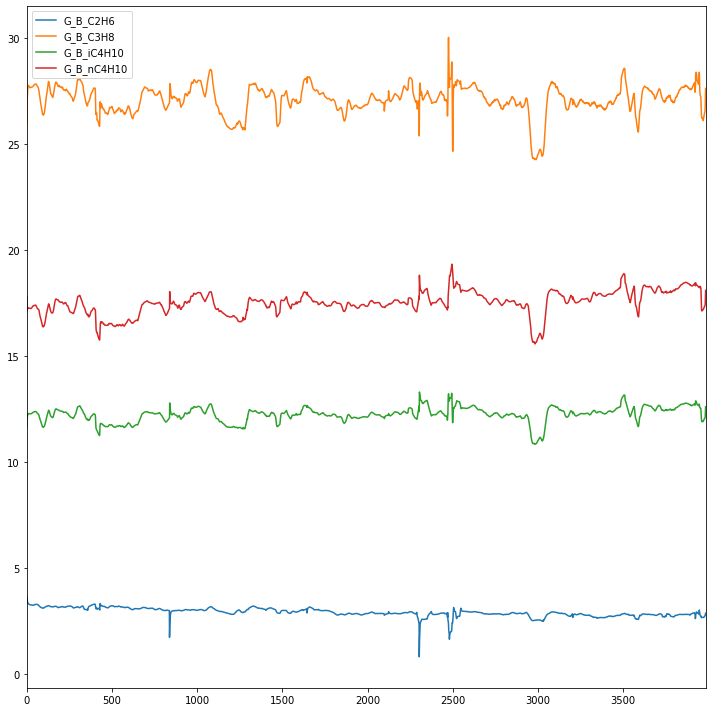

In [286]:
plt.rcParams["figure.figsize"] = (10,10)

test_data[['G_B_C2H6','G_B_C3H8','G_B_iC4H10','G_B_nC4H10']][:].plot()

# make room for tick labels
plt.tight_layout()


plt.show()

In [287]:
predict = pd.DataFrame()

In [288]:
predict[['timestamp']] = test_data[['timestamp']]

In [289]:
B = pd.DataFrame({'B_C2H6':[],'B_C3H8':[],'B_iC4H10':[], 'B_nC4H10':[]})

In [290]:
for i in range(test_data.shape[0]):
    new_line = {}
    B_C2H6 = test_data.loc[i,'G_B_C2H6'] * 100 / test_data.loc[i,'B_rate']
    B_C3H8 = test_data.loc[i,'G_B_C3H8'] * 100 / test_data.loc[i,'B_rate']
    B_iC4H10 = test_data.loc[i,'G_B_iC4H10'] * 100 / test_data.loc[i,'B_rate']
    B_nC4H10 = test_data.loc[i,'G_B_nC4H10'] * 100 / test_data.loc[i,'B_rate']
    
    new_line.update({'B_C2H6':B_C2H6,'B_C3H8':B_C3H8,'B_iC4H10':B_iC4H10,'B_nC4H10': B_nC4H10})
    B = B.append(new_line, ignore_index=True)

In [291]:
predict = pd.concat([predict,B] , axis=1)

In [292]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-04-30 23:30:00,5.024778,35.786361,16.030659,24.517125
1,2020-05-01 00:00:00,4.805201,36.378444,16.120431,23.051173
2,2020-05-01 00:30:00,4.694152,36.665373,16.291370,23.196218
3,2020-05-01 01:00:00,4.621344,36.989592,16.419616,23.268495
4,2020-05-01 01:30:00,4.583184,37.243711,16.507018,23.308912
...,...,...,...,...,...
3980,2020-07-22 21:30:00,3.872359,37.309825,16.981471,24.418501
3981,2020-07-22 22:00:00,3.870812,37.311575,16.988325,24.425375
3982,2020-07-22 22:30:00,3.884922,37.514386,17.054995,24.448129
3983,2020-07-22 23:00:00,3.905534,37.647500,17.120401,24.491264


In [293]:
predict.drop(0, axis=0, inplace=True)

In [294]:
predict = predict.reset_index(drop=True)

In [295]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.805201,36.378444,16.120431,23.051173
1,2020-05-01 00:30:00,4.694152,36.665373,16.291370,23.196218
2,2020-05-01 01:00:00,4.621344,36.989592,16.419616,23.268495
3,2020-05-01 01:30:00,4.583184,37.243711,16.507018,23.308912
4,2020-05-01 02:00:00,4.557355,37.407136,16.565854,23.340899
...,...,...,...,...,...
3979,2020-07-22 21:30:00,3.872359,37.309825,16.981471,24.418501
3980,2020-07-22 22:00:00,3.870812,37.311575,16.988325,24.425375
3981,2020-07-22 22:30:00,3.884922,37.514386,17.054995,24.448129
3982,2020-07-22 23:00:00,3.905534,37.647500,17.120401,24.491264


In [296]:
predict.to_csv('predictSGD.csv', sep=',', header=True, index=False)

In [297]:
a = pd.read_csv('sample_submission.csv', header = 0, sep = ',')
b = pd.read_csv('predictSGD.csv', header = 0, sep = ',')

In [298]:
a

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.363701,37.742757,16.843028,24.171264
1,2020-05-01 00:30:00,4.363701,37.742757,16.843028,24.171264
2,2020-05-01 01:00:00,4.363701,37.742757,16.843028,24.171264
3,2020-05-01 01:30:00,4.363701,37.742757,16.843028,24.171264
4,2020-05-01 02:00:00,4.363701,37.742757,16.843028,24.171264
...,...,...,...,...,...
3979,2020-07-22 21:30:00,4.363701,37.742757,16.843028,24.171264
3980,2020-07-22 22:00:00,4.363701,37.742757,16.843028,24.171264
3981,2020-07-22 22:30:00,4.363701,37.742757,16.843028,24.171264
3982,2020-07-22 23:00:00,4.363701,37.742757,16.843028,24.171264


In [299]:
b

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.805201,36.378444,16.120431,23.051173
1,2020-05-01 00:30:00,4.694152,36.665373,16.291370,23.196218
2,2020-05-01 01:00:00,4.621344,36.989592,16.419616,23.268495
3,2020-05-01 01:30:00,4.583184,37.243711,16.507018,23.308912
4,2020-05-01 02:00:00,4.557355,37.407136,16.565854,23.340899
...,...,...,...,...,...
3979,2020-07-22 21:30:00,3.872359,37.309825,16.981471,24.418501
3980,2020-07-22 22:00:00,3.870812,37.311575,16.988325,24.425375
3981,2020-07-22 22:30:00,3.884922,37.514386,17.054995,24.448129
3982,2020-07-22 23:00:00,3.905534,37.647500,17.120401,24.491264


In [300]:
#test_data.to_excel('123.xlsx')